In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
from datetime import datetime, timedelta

sns.set_style({'font.sans-serif':'Laksaman'})
#sns.set_style('whitegrid', {'font.sans-serif':'Laksaman'})

In [2]:
Country = 'China'

In [7]:
#dr = pd.read_csv("./datasets_clean/all_reactors.csv")
dr = pd.read_csv("./datasets_clean/2021Table14_clean.csv")

dr = dr.loc[dr['Country']==Country.upper(), :]
#dr = da.sort_values(by='Start')[0:100].copy(deep=True)

## Add order for plotting
dr['current_num'] = np.arange(len(dr))
dr['ctime_y'] = dr["Construction_time"]/365.0

##
# Since the first reactor in the database starts at 1951, we round down the axis to 1950, to have round numbers
mintime = datetime(1950, 1, 1)#datetime.strptime(min(dr['Start']), "%Y-%m-%d")
maxtime = datetime(2020, 12, 31)

endtime_int = (maxtime-mintime).days/365.0

dr['ctime_start'] = (pd.to_datetime(dr['Start']) - mintime).dt.days/365.0

lendays = (maxtime-mintime).days
leny = lendays/365
dr = dr.sort_values(by='Start', ascending=False)

#### Color type
c_dict = {'PWR  ':'#377eb8',
          'BWR  ':'#ff7f00',
          'GCR  ':'#4daf4a',
          'PHWR ':'#f781bf',
          'FBR  ':'#a65628',
          'LWGR ':'#984ea3',
          'HWLWR':'#999999',
          'HTGR ':'#dede00',
          'HWGCR':'#dede00',
          'SGHWR':'#dede00',
          'X    ':'#dede00'}
#                  , , ,
#                  , , 
#c_dict = {'PWR  ':'#E64646', 'BWR  ':'#7FFF00', 'GCR  ':'#E69646', 'PHWR ':'#E69646','FBR  ':'#3475D0', 'LWGR ':'#8A7C79','HWLWR':'#3475D0','HTGR ':'#3475D0', 'HWGCR':'#3475D0', 'SGHWR':'#3475D0', 'X    ':'#3475D0'}
dr['color_type'] = dr['Type']
dr.replace({"color_type": c_dict}, inplace=True)
dr.reset_index(inplace=True, drop=True)

In [8]:
dr.head()

,Country,Code,Name,Type,Model,Thermal,Gross,Net,Operator,Supplier,...,Shutdown,EAF,UCF,NEA,Status,Construction_time,current_num,ctime_y,ctime_start,color_type
0,CHINA,CN -54,TIANWAN-6,PWR,CNP-1000,2905,1118,1060,JNPC,CFHI,...,NaN,98.9,100.0,-,Online,1703,47,4.665753,66.712329,#377eb8
1,CHINA,CN -53,TIANWAN-5,PWR,CNP-1000,2905,1118,1060,JNPC,SHE,...,NaN,86.5,87.4,-,Online,1705,46,4.671233,65.958904,#377eb8
2,CHINA,CN -51,FUQING-5,PWR,HPR1000,3060,1150,1075,FQNP,NPIC,...,NaN,91.5,92.1,-,Online,2011,45,5.509589,65.372603,#377eb8
3,CHINA,CN -49,HONGYANHE-5,PWR,ACPR-1000,2905,1119,1061,LHNPC,DEC,...,NaN,97.7,100.0,-,Online,2284,43,6.257534,65.205479,#377eb8
4,CHINA,CN -48,YANGJIANG-6,PWR,ACPR-1000,2905,1086,1000,YJNPC,CFHI,...,NaN,92.4,92.4,-,Online,2008,42,5.501370,63.958904,#377eb8


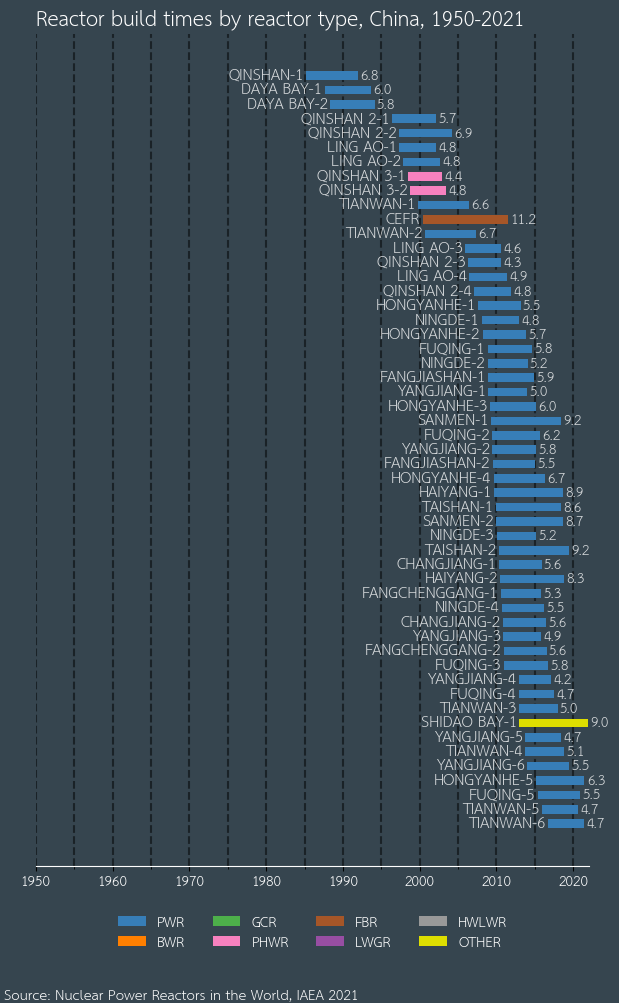

In [10]:
##### PLOT #####
facecolor = '#36454F'

fig, (ax, ax1) = plt.subplots(2, figsize=(6,10), gridspec_kw={'height_ratios':[11, 1]}, facecolor=facecolor)

ax.set_facecolor(facecolor)
ax1.set_facecolor(facecolor)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])


# ticks
xticks = np.linspace(0, np.floor(endtime_int/10)*10, 8, endpoint=True)
xticks_labels = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']#pd.date_range(mintime, end=maxtime, periods=8).strftime("%Y")
xticks_minor = np.linspace(0, np.floor(endtime_int/10)*10, 15, endpoint=True)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels, color='w')
ax.set_yticks([])

plt.setp([ax.get_xticklines()], color='w')

# align x axis
ax.set_xlim(0, 72.1)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')

#Make custon grid lines
ax.set_axisbelow(True)
#Make custom grid
for t in xticks_minor:
    ax.axvline(t, color='k', linestyle='--', alpha=0.5, zorder=-1)

# bars
ax.barh(dr.Name, dr.ctime_y, left=dr.ctime_start, height=0.6, color=dr.color_type)
#ax.barh(dr.Start, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

ax.set_title('Reactor build times by reactor type, ' + Country + ', 1950-2021', color='w', loc='left', size='x-large')

plt.tight_layout()
ax.annotate('Source: Nuclear Power Reactors in the World, IAEA 2021', xy=(3, 3), xycoords='figure points', color='w')

c_dict = {'PWR  ':'#377eb8',
          'BWR  ':'#ff7f00',
          'GCR  ':'#4daf4a',
          'PHWR ':'#f781bf',
          'FBR  ':'#a65628',
          'LWGR ':'#984ea3',
          'HWLWR':'#999999',
          'HTGR ':'#dede00',#'#e41a1c',
          'HWGCR':'#dede00',
          'SGHWR':'#dede00',
          'X    ':'#dede00'}


##### LEGENDS #####
legend_elements = [Patch(facecolor='#377eb8', label='PWR'),
                   Patch(facecolor='#ff7f00', label='BWR'),
                   Patch(facecolor='#4daf4a', label='GCR'),
                   Patch(facecolor='#f781bf', label='PHWR'),
                   Patch(facecolor='#a65628', label='FBR'),
                   Patch(facecolor='#984ea3', label='LWGR'),
                   Patch(facecolor='#999999', label='HWLWR'),
                   Patch(facecolor='#dede00', label='OTHER')
                  ]

for idx, row in dr.iterrows():
    ax.text(row.ctime_y + row.ctime_start + 0.3, idx, 
            "%.1f"%(row.ctime_y), 
            va='center', ha='left', alpha=0.8, color='w')
    ax.text(row.ctime_start - 0.3, idx, 
            row.Name, 
            va='center', ha='right', alpha=0.8, color='w', fontsize=11)

    

legend = ax1.legend(handles=legend_elements, loc='upper center', ncol=4, frameon=False)
plt.setp(legend.get_texts(), color='w')

plt.savefig("ReactorBuild.png", dpi=300)
plt.show()

In [12]:
#

In [38]:
dr

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,...,Start,Connection,Operation,Shutdown,Construction_time,Online,current_num,ctime_y,ctime_start,color_type
0,JAPAN,JP -64,TOMARI-3,PWR,M (3-loop),2660,912,866,HEPCO,MHI,...,2004-11-01,2009-03-01,2009-12-01 00:00:00,NaN,1581,True,58,4.331507,55.871233,#377eb8
1,JAPAN,JP -59,SHIKA-2,BWR,ABWR,3926,1206,1108,HOKURIKU,HITACHI,...,2001-08-01,2005-07-01,2006-03-01 00:00:00,NaN,1430,True,56,3.917808,52.616438,#ff7f00
2,JAPAN,JP -58,HIGASHI DORI-1 (TOHOKU),BWR,BWR-5,3293,1100,1067,TOHOKU,TOSHIBA,...,2000-11-01,2005-03-01,2005-12-01 00:00:00,NaN,1581,True,55,4.331507,51.868493,#ff7f00
3,JAPAN,JP -60,HAMAOKA-5,BWR,ABWR,3926,1380,1325,CHUBU,TOSHIBA,...,2000-07-01,2004-04-01,2005-01-01 00:00:00,NaN,1370,True,57,3.753425,51.531507,#ff7f00
4,JAPAN,JP -57,ONAGAWA-3,BWR,BWR-5,2436,825,796,TOHOKU,TOSHIBA,...,1998-01-01,2001-05-01,2002-01-01 00:00:00,NaN,1216,True,54,3.331507,49.032877,#ff7f00
5,JAPAN,JP -56,KASHIWAZAKI KARIWA-7,BWR,ABWR,3926,1356,1315,TEPCO,HITACHI,...,1993-07-01,1996-12-01,1997-07-01 00:00:00,NaN,1249,True,53,3.421918,44.526027,#ff7f00
6,JAPAN,JP -55,KASHIWAZAKI KARIWA-6,BWR,ABWR,3926,1356,1315,TEPCO,TOSHIBA,...,1992-11-01,1996-01-01,1996-11-01 00:00:00,NaN,1156,True,52,3.167123,43.863014,#ff7f00
7,JAPAN,JP -46,GENKAI-4,PWR,M (4-loop),3423,1180,1127,KYUSHU,MHI,...,1992-07-01,1996-11-01,1997-07-01 00:00:00,NaN,1584,True,43,4.339726,43.526027,#377eb8
8,JAPAN,JP -54,ONAGAWA-2,BWR,BWR-5,2436,825,796,TOHOKU,TOSHIBA,...,1991-04-01,1994-12-01,1995-07-01 00:00:00,NaN,1340,True,51,3.671233,42.273973,#ff7f00
9,JAPAN,JP -47,IKATA-3,PWR,M (3-loop),2660,890,846,SHIKOKU,MHI,...,1990-10-01,1994-03-01,1994-12-01 00:00:00,NaN,1247,True,44,3.416438,41.775342,#377eb8
